# Feature Engineering

The process of creating, modifying, or selecting more relevant features from the raw data to improve the model performance.

# Table of Contents

1. [Mutual Information](#mutual-information)

## Mutual Information

Measuring the relationship between a feature and the target

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
automobile_data = pd.read_csv("dataset/Automobile_data.csv")
automobile_data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


As seen from above data, there are few features which have "?"  
1. we can either drop those values  
2. or, we can use any of the Data Cleaning steps to replace them!  

Before doing any, let's see how much of our data has "?" in it:

In [3]:
# Check for "?" in the dataset and count the number of records with "?"
question_mark_count = (automobile_data == "?").sum()
print(f"Total number of records with '?': {question_mark_count}")

# how many total missing values do we have?
total_cells = np.prod(
    automobile_data.shape
)  # np.prod returns the product of all elements in the input
print(
    f"Total cells in the dataset with a shape of {automobile_data.shape} is: {total_cells}"
)
print(f"Total cells in the dataset: {total_cells}")
total_missing = question_mark_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

Total number of records with '?': symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
Total cells in the dataset with a shape of (205, 26) is: 5330
Total cells in the dataset: 5330
1.1069418386491556


So, from above, we have 1% of data that has "?" in them.

In [4]:
# Let's drop those "?" records and see:
automobile_data_drop_unknowns = automobile_data.replace('?', np.nan).dropna(axis=0)
automobile_data_drop_unknowns.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
(automobile_data_drop_unknowns == "?").sum().sum()

np.int64(0)

In [6]:
X = automobile_data_drop_unknowns.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

# After label encoding:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,2,0,0,0,0,0,0,0,0,99.8,...,0,109,0,0,0,10.0,0,0,24,30
4,2,0,0,0,0,0,0,1,0,99.4,...,1,136,0,0,0,8.0,1,0,18,22
6,1,1,0,0,0,0,0,0,0,105.8,...,1,136,0,0,0,8.5,2,0,19,25
8,1,1,0,0,1,0,0,0,0,105.8,...,1,131,0,1,0,8.3,3,0,17,20
10,2,2,1,0,0,1,0,2,0,101.2,...,0,108,0,2,1,8.8,4,1,23,29


`scikit-learn` has `feature-selection` module with two mutual information selections:  

1. `mutual-info-regression` - for real values  
2. `mutual-info-classif` - for categorical values  

In [7]:
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:]  # show features with their MI scores

curb-weight          1.525540
horsepower           1.100730
highway-mpg          0.913692
engine-size          0.851328
city-mpg             0.737650
length               0.703937
width                0.689769
wheel-base           0.625956
stroke               0.620492
normalized-losses    0.598653
bore                 0.575949
fuel-system          0.469411
make                 0.429931
peak-rpm             0.405151
height               0.298807
drive-wheels         0.275414
num-of-cylinders     0.258307
symboling            0.183778
aspiration           0.119975
engine-type          0.113969
compression-ratio    0.099745
body-style           0.056055
fuel-type            0.052174
engine-location      0.000000
num-of-doors         0.000000
Name: MI Scores, dtype: float64

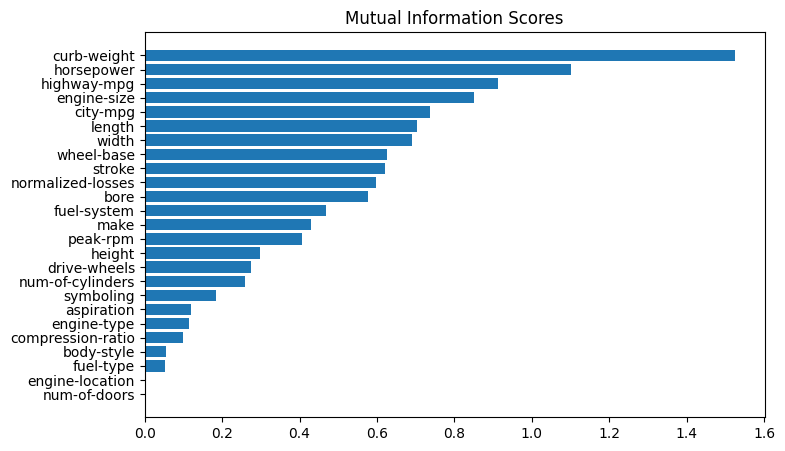

In [8]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

From above, curb-weight has stronger relationship with the price!

<Figure size 3500x5500 with 0 Axes>

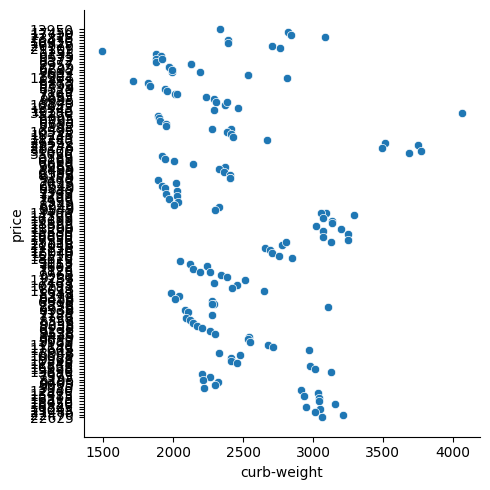

In [15]:
plt.figure(figsize=(35, 55))
sns.relplot(x="curb-weight", y="price", data=automobile_data_drop_unknowns)

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

<Figure size 2000x1600 with 0 Axes>

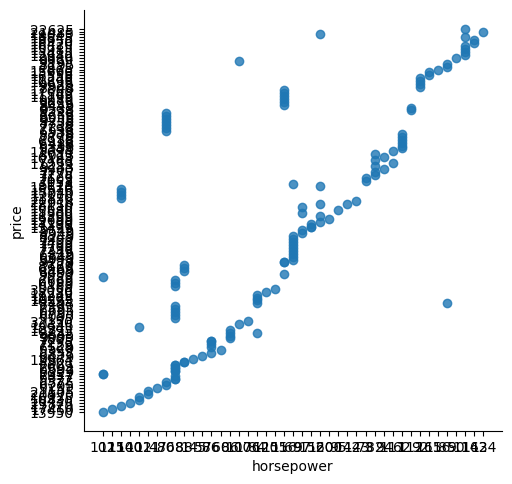

In [23]:
plt.figure(figsize=(20, 16))
sns.lmplot(
    x="horsepower", y="price", hue="fuel-type", data=automobile_data_drop_unknowns
)